Import Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Mount Google Drive to your Colab environment.

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load Data and shows first 10 rows of data.

In [6]:
Data = pd.read_csv(r'/content/gdrive/My Drive/Titanic-Dataset.csv')
Data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Drop Unnecessary Columns

In [7]:
Data=Data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
Data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Calculates statistical values and rounds them to 3 decimal places.

In [9]:
Data.describe().round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


Mark null values as True and returns sum of number of True values in each column

In [10]:
Data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


Handling Null Values and Pre Processing the dataset.

In [11]:
Data['Age']=Data['Age'].fillna(Data['Age'].mean())
Data['Fare']=Data['Fare'].fillna(Data['Fare'].mean())
Data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


Data Visualization

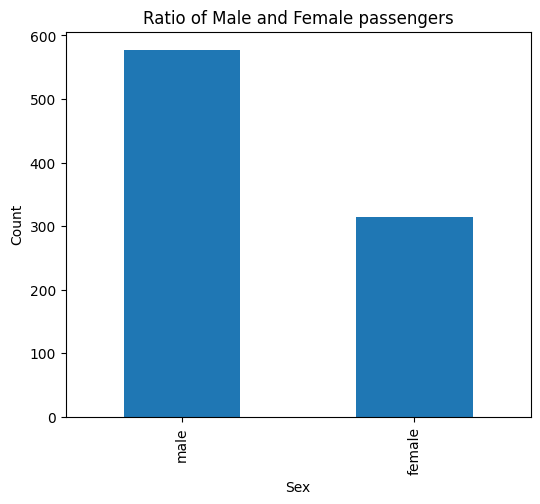

In [12]:
ax=Data['Sex'].value_counts().plot(kind='bar',x = 'Survived',figsize=(6,5))    # creating coundplot
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

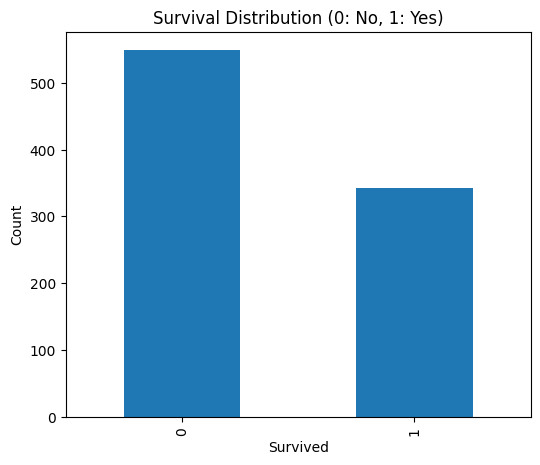

In [13]:
ax=Data['Survived'].value_counts().plot(kind='bar',figsize=(6,5))    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

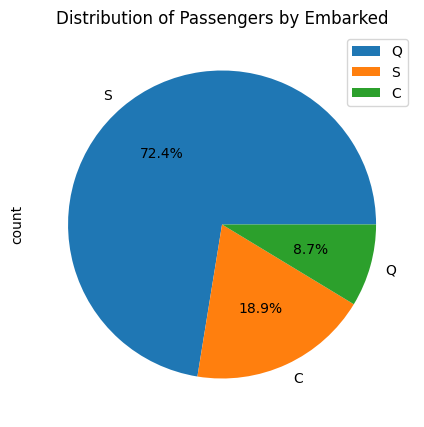

In [14]:
ax=Data['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

<ipython-input-15-4f3bb4bdbe63>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Q", "S", "C"])


[]

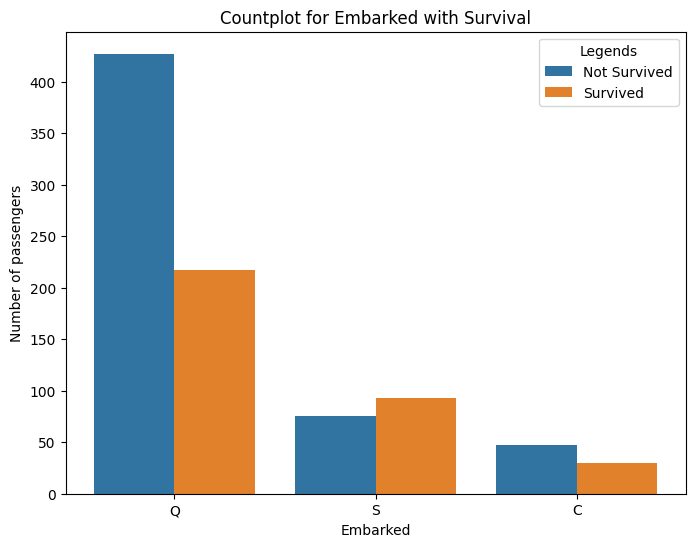

In [15]:
_, ax = plt.subplots(figsize = (8, 6))
snr.countplot(data = Data, x = "Embarked", hue = "Survived", ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

Change the catagorical data into numerical data by using OneHotEncoding.

In [16]:
Data['Sex']=Data['Sex'].apply({'male':1,'female':0}.get)
Data['Embarked']=Data['Embarked'].apply({'S':1,'Q':2,'C':3}.get)
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,3.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


Dividing the data into Dependent and Independent variables.

In [41]:
#Deviding the cleaned data into training and testing sets.
x=Data.drop(['Survived'],axis=1)
y=Data['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

#Creating first machine learning model 'k-nearest neighbour'.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
# Drop rows with missing values
x = x.dropna()

# If y has missing values, handle that as well
y = y.loc[x.index]  # Ensure y matches the new x after dropping rows

# Proceed with the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

#Train the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

Make Predictions on the model

In [42]:
predictions=knn.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0]


Check the confusion metrix and accuracy scoore

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [44]:
print(cm)

[[84 21]
 [38 35]]


In [45]:
print(ac)

0.6685393258426966


Creating Second Machine Learning Model 'Decision Tree'

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [47]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions=tree.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


Check the Confusion metrix and Accuracy score.

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [50]:
print(cm)

[[90 15]
 [26 47]]


In [51]:
print(ac)

0.7696629213483146


Creating third machine learning model 'Support Vector Machine'.

In [52]:
from sklearn.svm import SVC
svm=SVC()

In [53]:
svm.fit(x_train,y_train)

SVC()

In [54]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


Check the Confusion metrix and Accuracy score.

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [56]:
print(cm)

[[98  7]
 [55 18]]


In [57]:
print(ac)

0.651685393258427
